In [56]:
#Loading Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Importing the Model Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

#Importing Boosting Models
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier

#Importing Error Metrics
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score,roc_curve,auc,f1_score


In [2]:
#Loading preprocessing pipline functions
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from scipy.stats import zscore

In [3]:
# Uploading the dataset in jupyter Notebook.
mcd=pd.read_csv('Data file.csv')

In [88]:
# Calling our dataset in jupyter Notebook.
mcd

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,-0.510570,0.492214,0.469614,-0.805176,-0.794585,-0.300486,-0.182168,0.083417,-0.275617,...,0.011773,-0.097563,-0.130678,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,1.813266,1.783964
1,1,0.410198,1.106126,1.059052,0.774494,0.614538,1.424935,-0.182168,1.501277,-0.799355,...,-0.913019,-0.097563,1.241244,-0.269051,-1.034294,-0.250850,2.325828,-0.248272,-0.937405,-1.018917
2,1,0.150760,0.179853,0.165292,-0.120256,-0.216868,0.026239,-0.182168,0.083417,-0.799355,...,-0.913019,-0.894782,-0.130678,-0.269051,-1.034294,-1.005714,-0.285611,-0.248272,-0.937405,-1.018917
3,1,-0.636224,-1.124028,-1.121774,-0.937959,-0.989422,1.823795,-0.182168,-0.291052,-1.694157,...,0.011773,-0.097563,-0.130678,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,-0.937405,-1.018917
4,1,0.657942,-0.586130,-0.585941,-0.007664,-0.111533,0.259912,-0.182168,0.449550,0.992270,...,1.570451,1.454951,-0.130678,-0.269051,1.180312,1.097886,-0.285611,-0.248272,0.639236,0.431438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,-0.115528,-0.583595,-0.583434,-0.012763,-0.116298,-0.814667,-0.182168,1.051183,0.096120,...,0.011773,-0.097563,-0.130678,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,0.094998,-0.098305
209589,1,0.764602,-0.984481,-0.982011,0.264092,0.141814,0.259912,-0.182168,-0.429509,0.384542,...,0.556347,0.393236,-0.130678,-0.269051,0.300689,0.192260,-0.285611,-0.248272,0.094998,-0.098305
209590,1,0.714884,1.095040,1.050685,1.123108,1.247768,0.026239,-0.182168,0.083417,0.620252,...,0.924658,1.454951,1.241244,-0.269051,1.038116,1.358455,2.325828,-0.248272,0.974292,0.752939
209591,1,1.147613,1.120340,1.075701,-0.522908,-0.169986,-0.300486,5.490532,-0.429509,0.620252,...,0.011773,0.393236,1.241244,-0.269051,0.300689,0.503740,2.325828,-0.248272,-0.937405,1.337831


# Exploratory Data Analysis

In [5]:
# Checking out the information of columns in our dataset.

mcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [6]:
# Checking the total rows and columns in our dataset.
mcd.shape

(209593, 37)

In [8]:
mcd.isna().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

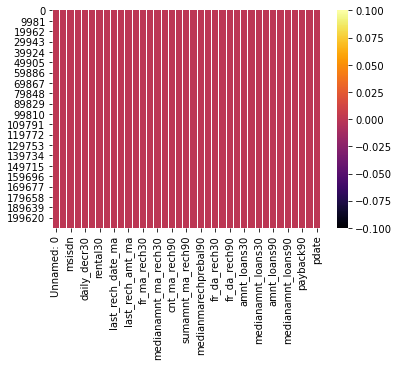

In [9]:
#Checking of null values in our dataset by passing a heatmap function.

sns.heatmap(mcd.isnull(),cmap='inferno')

We observed that in our dataset there are no null values present.

In [10]:
# Dropping Unnamed 0, msisdn,pdate,pcircle feature from our dataset as it is not giving any insights for our machine learning.
mcd.drop(['msisdn','pdate','pcircle','Unnamed: 0'],axis=1, inplace=True)

In [11]:
list=[]
for i in mcd.columns:
    if mcd[i].dtypes!='object':
        list.append(i)
list

['label',
 'aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'last_rech_date_ma',
 'last_rech_date_da',
 'last_rech_amt_ma',
 'cnt_ma_rech30',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianamnt_ma_rech30',
 'medianmarechprebal30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'sumamnt_ma_rech90',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_da_rech30',
 'fr_da_rech30',
 'cnt_da_rech90',
 'fr_da_rech90',
 'cnt_loans30',
 'amnt_loans30',
 'maxamnt_loans30',
 'medianamnt_loans30',
 'cnt_loans90',
 'amnt_loans90',
 'maxamnt_loans90',
 'medianamnt_loans90',
 'payback30',
 'payback90']

In [12]:
# The abs() function is used to return the absolute value of a number.
for y in list:
    mcd[y]=abs(mcd[y])

In [13]:
mcd

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,...,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000


In [14]:

mcd.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.808718,5381.431293,6082.544140,2715.376558,3509.497148,3756.125844,3712.204801,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.032666,9220.606472,10918.796572,4294.257439,5754.630600,53905.872857,53374.833299,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.453000,42.693333,299.700000,330.000000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1095.750000,1347.220000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3362.350000,4204.510000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


Observations:

Apart from label column in all the other columns mean is greater than median(50%) which shows it is right skewed and its 75% and max difference is very high which shows there are outliers present in it.


# Visualization

Univariate analysis

1    183431
0     26162
Name: label, dtype: int64


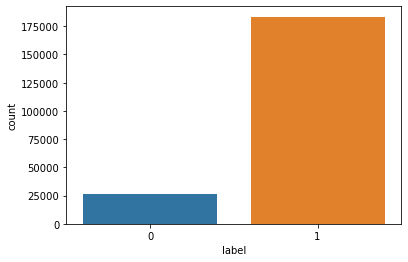

In [62]:
sns.countplot(mcd['label'])
print(mcd['label'].value_counts())

We observe that in our target variable their are two attributes 0 & 1.
0= Defaulter 26162
1= Non-Defaulter 183431


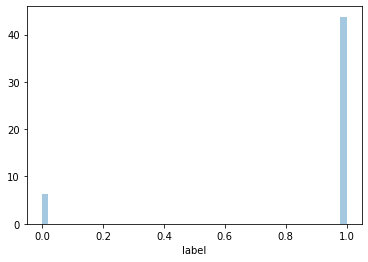

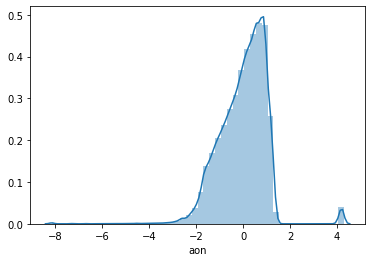

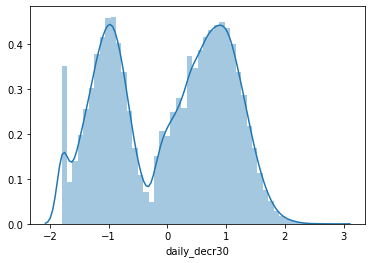

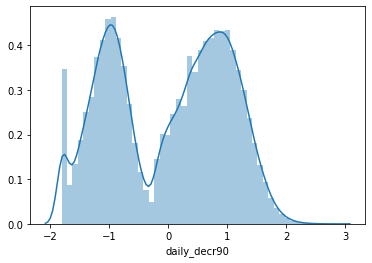

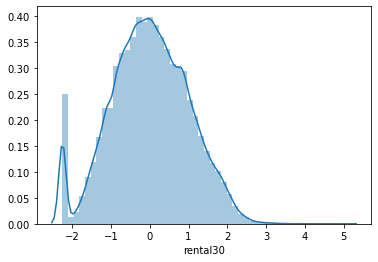

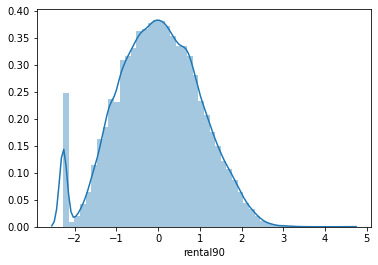

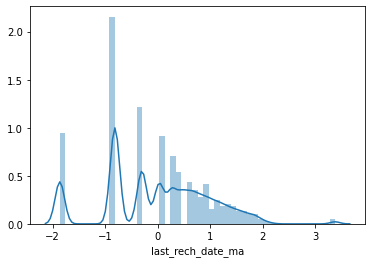

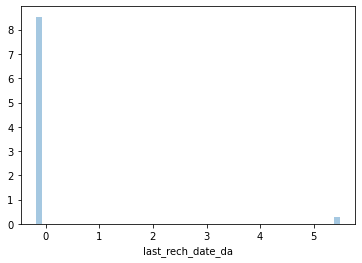

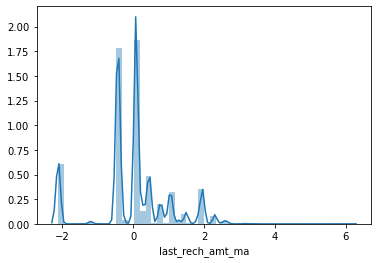

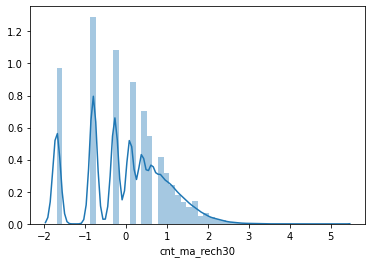

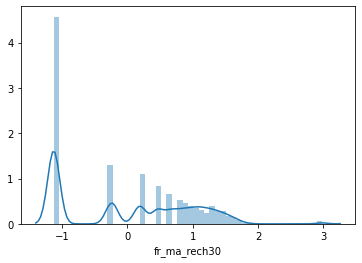

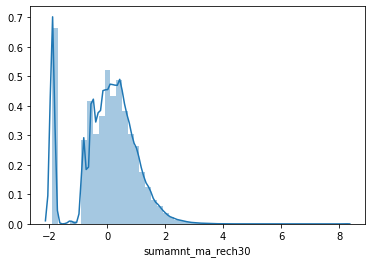

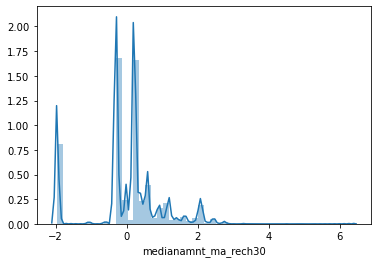

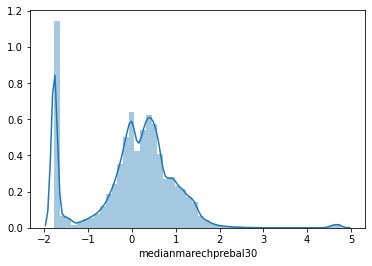

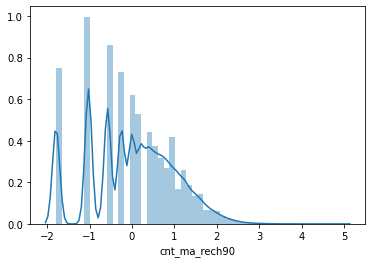

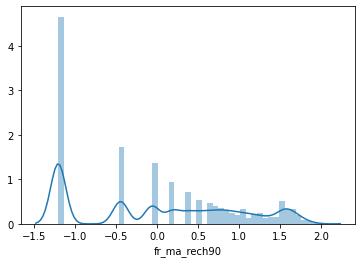

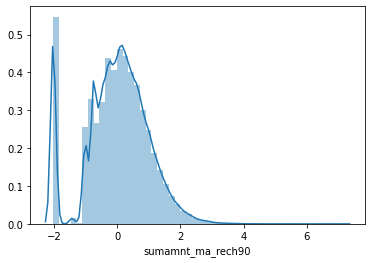

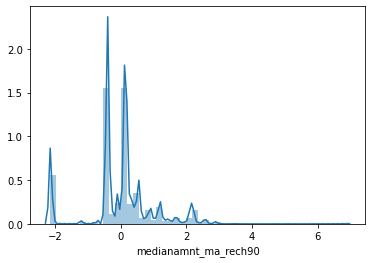

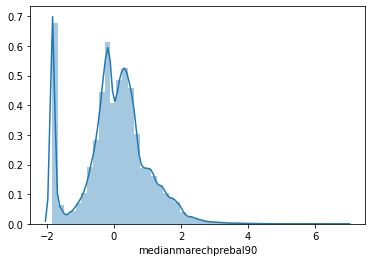

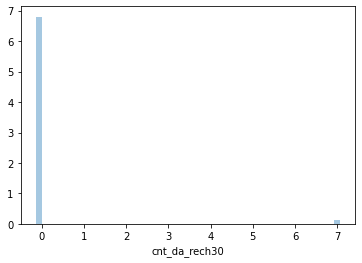

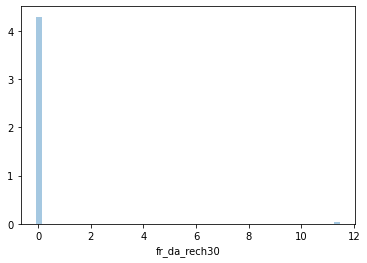

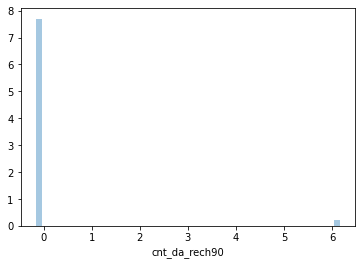

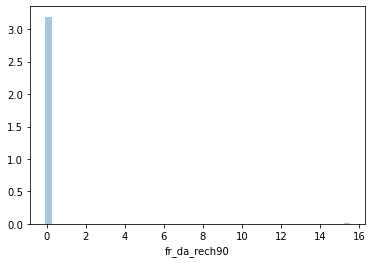

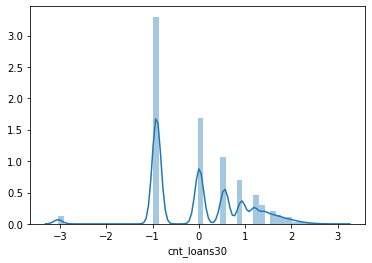

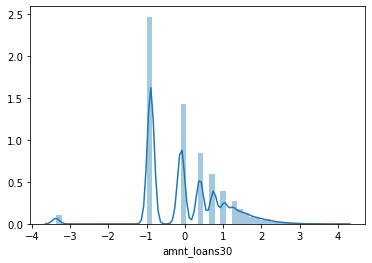

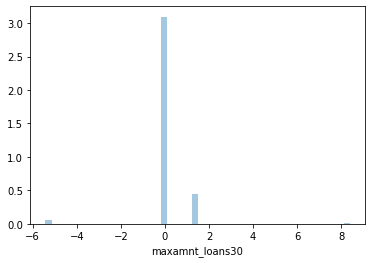

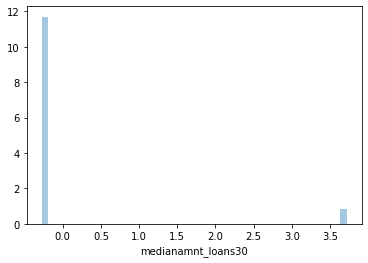

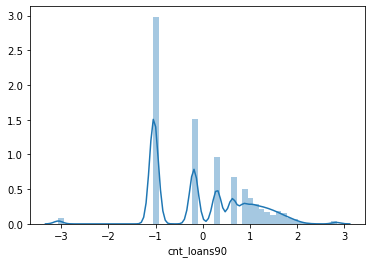

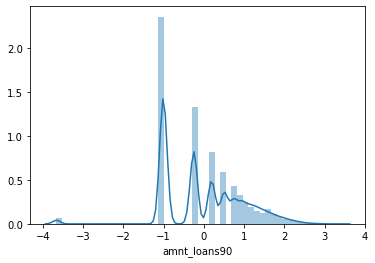

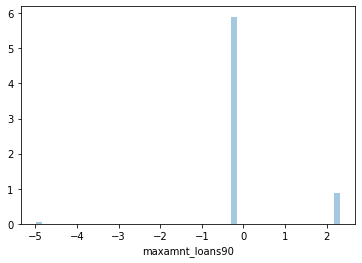

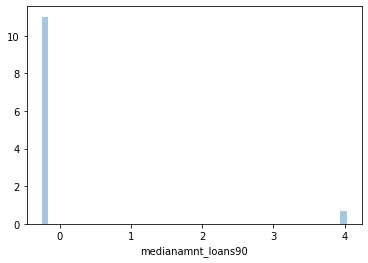

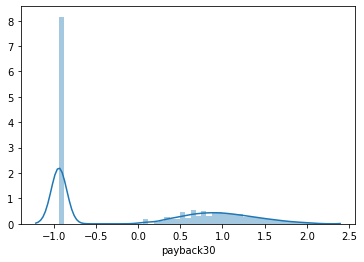

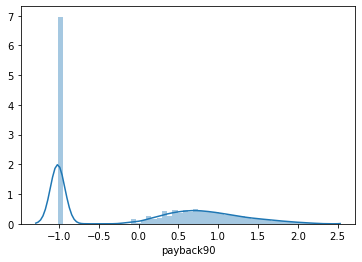

In [86]:
# Making of distplot to show the skewness in different columns
for g in mcd.describe().columns:
    sns.distplot(mcd[g])
    plt.show()

Bivariate analysis

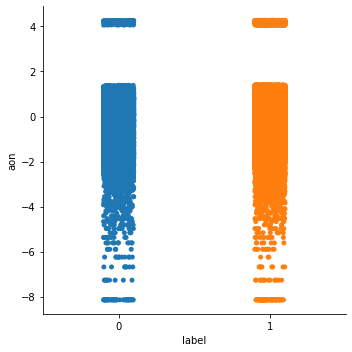

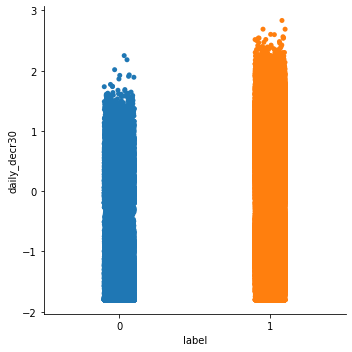

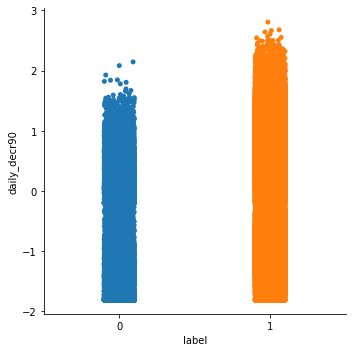

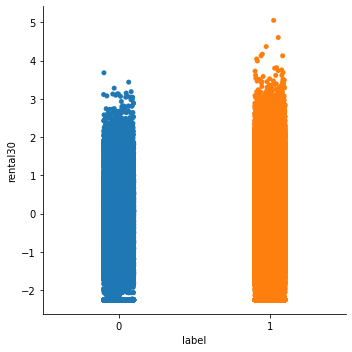

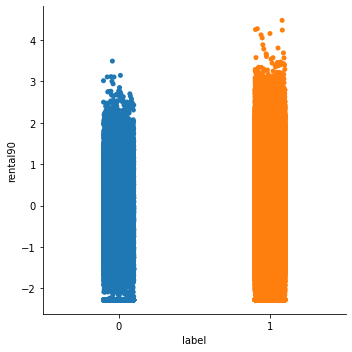

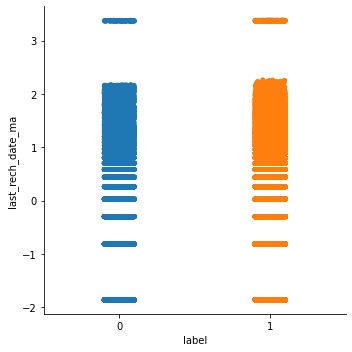

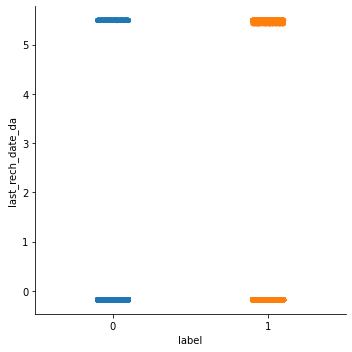

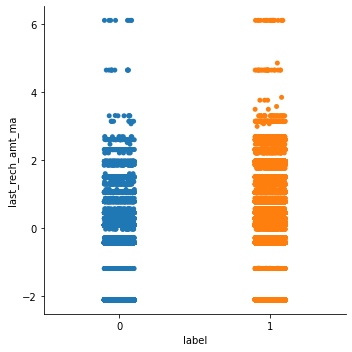

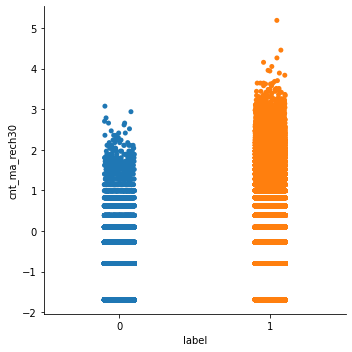

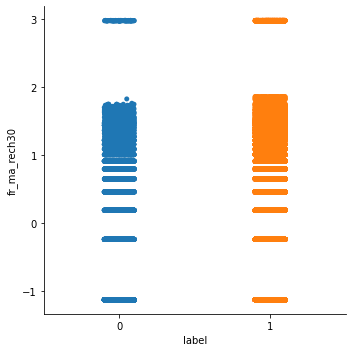

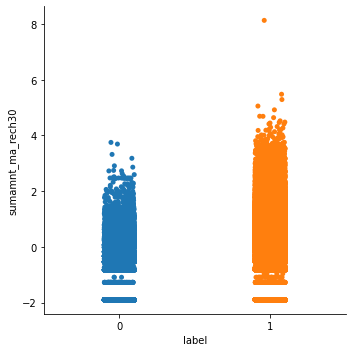

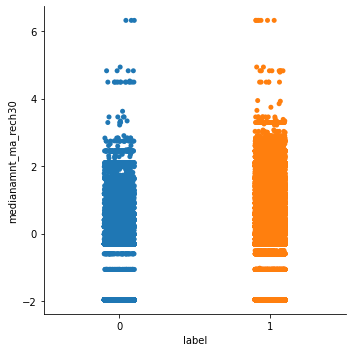

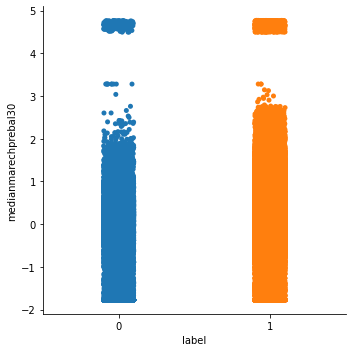

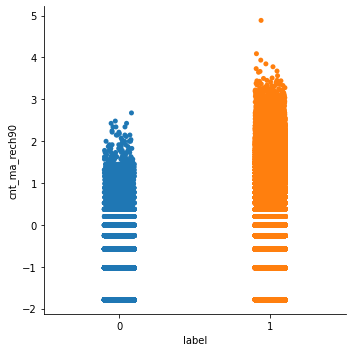

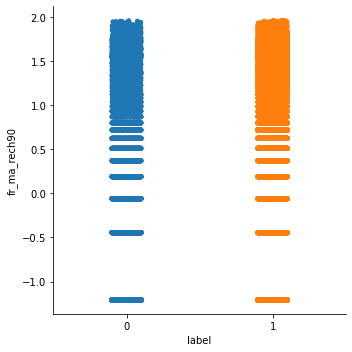

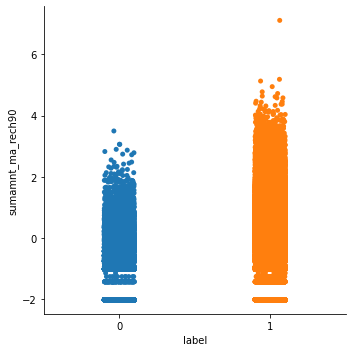

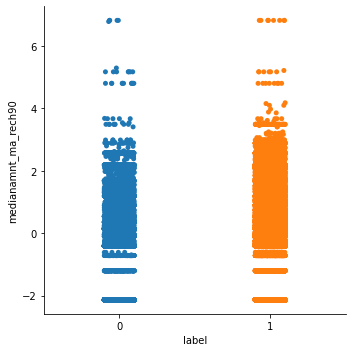

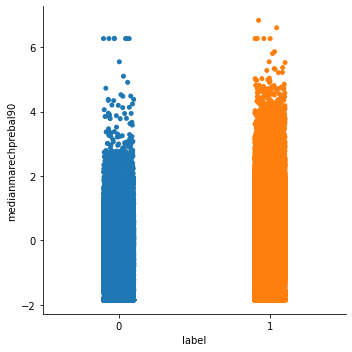

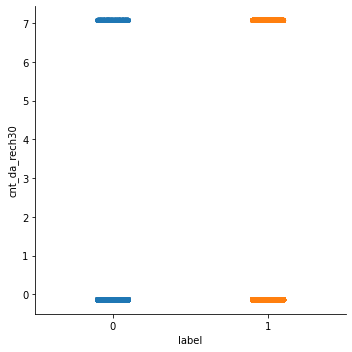

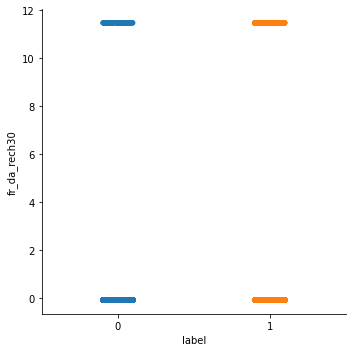

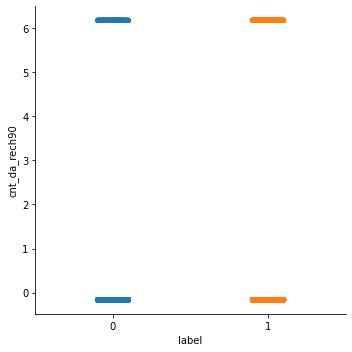

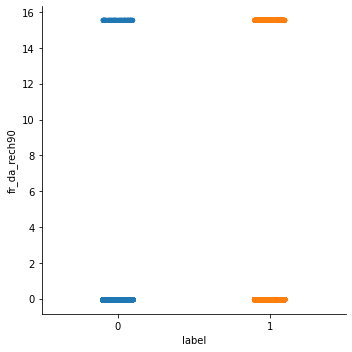

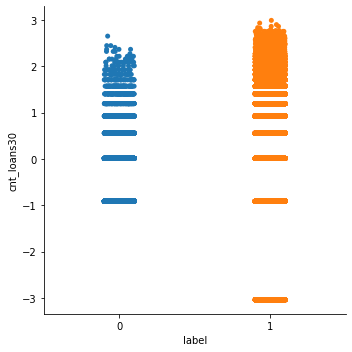

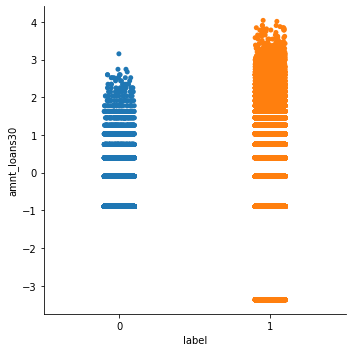

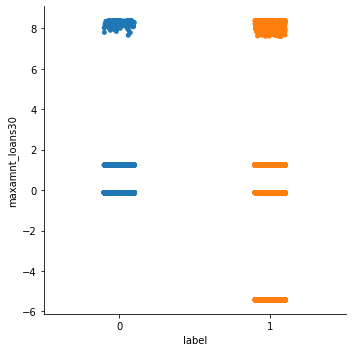

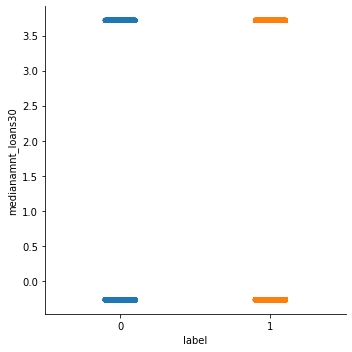

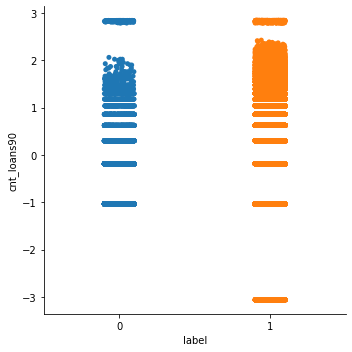

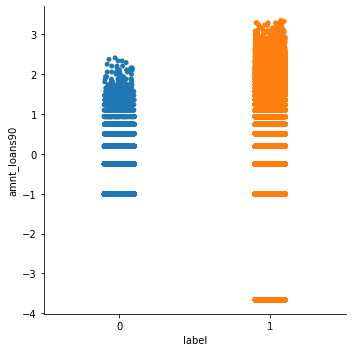

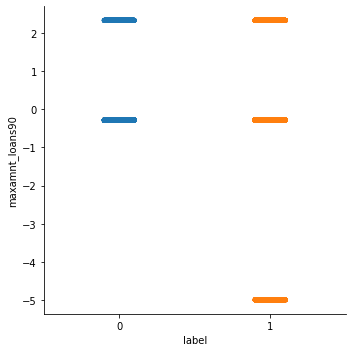

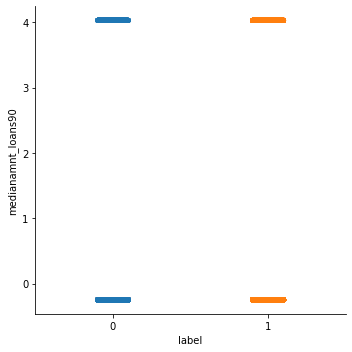

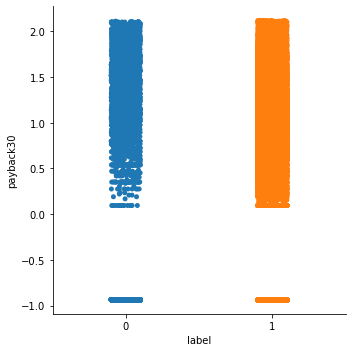

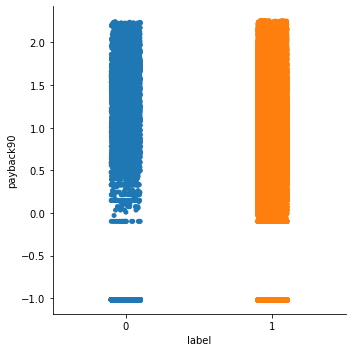

In [66]:
list=['aon',
'daily_decr30',
'daily_decr90',
'rental30',
'rental90',
'last_rech_date_ma',
'last_rech_date_da',
'last_rech_amt_ma',
'cnt_ma_rech30',
'fr_ma_rech30',
'sumamnt_ma_rech30',
'medianamnt_ma_rech30',
'medianmarechprebal30',
'cnt_ma_rech90',
'fr_ma_rech90',
'sumamnt_ma_rech90',
'medianamnt_ma_rech90',
'medianmarechprebal90',    
'cnt_da_rech30',           
'fr_da_rech30',            
'cnt_da_rech90',
'fr_da_rech90',  
'cnt_loans30',             
'amnt_loans30',            
'maxamnt_loans30',         
'medianamnt_loans30',      
'cnt_loans90',             
'amnt_loans90',            
'maxamnt_loans90',         
'medianamnt_loans90',      
'payback30',               
'payback90']

for i in list:
    sns.catplot(x='label',y=i,data=mcd)
    plt.show()

Doing Bivariate analysis putting all columns in check with our target variable 'label'.
Checking how the data of the desired column is spread.

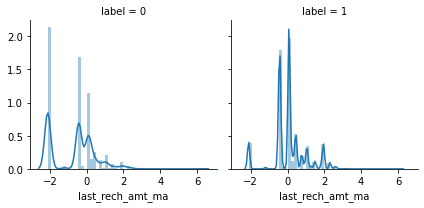

In [74]:
#Facegrid

face=sns.FacetGrid(mcd,col='label')
face.map(sns.distplot,'last_rech_amt_ma')
plt.show()

For Amount of last recharge of main account (in Indonesian Rupiah we can see most of the entries  for defaulters,non-defaulters can be see in the rane from -2 to 2

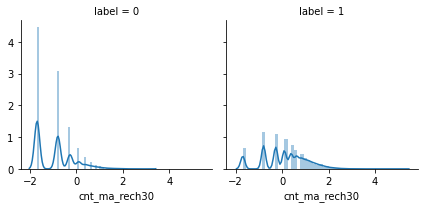

In [75]:
face=sns.FacetGrid(mcd,col='label')
face.map(sns.distplot,'cnt_ma_rech30')
plt.show()

For Number of times main account got recharged in last 30 days we observe that our target 'label' lie in the range from -2 to 2.

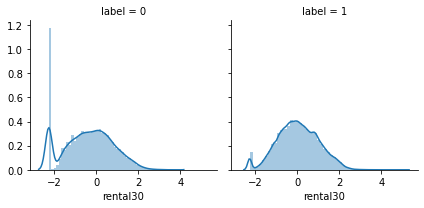

In [77]:
face=sns.FacetGrid(mcd,col='label')
face.map(sns.distplot,'rental30')
plt.show()

For Average main account balance over last 30 days we observe that target label lie in the range form -2 to -2.

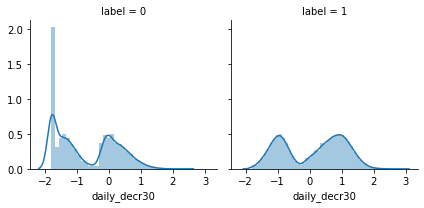

In [78]:
face=sns.FacetGrid(mcd,col='label')
face.map(sns.distplot,'daily_decr30')
plt.show()

For Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah) we observe that target "label" lie in the range from -2 to 2. But we also notice that in 15 days interval the daily amount spend is very low.

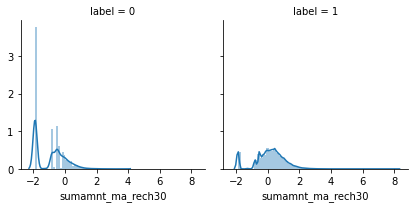

In [79]:
face=sns.FacetGrid(mcd,col='label')
face.map(sns.distplot,'sumamnt_ma_rech30')
plt.show()

For Total amount of recharge in main account over last 30 days (in Indonesian Rupiah) we observe in label respect that the range of data lies in -2 to 2.

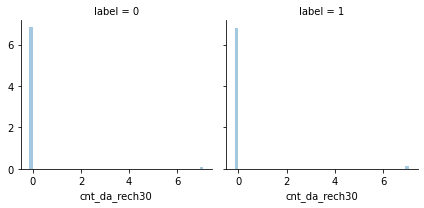

In [80]:
face=sns.FacetGrid(mcd,col='label')
face.map(sns.distplot,'cnt_da_rech30')
plt.show()

For Number of times data account got recharged in last 30 days we there is a very minimum usage of data thats why no one recharging for data.

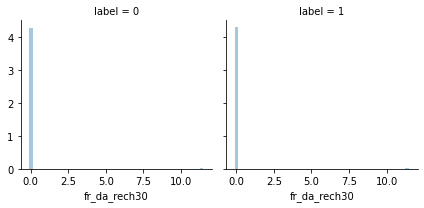

In [81]:
face=sns.FacetGrid(mcd,col='label')
face.map(sns.distplot,'fr_da_rech30')
plt.show()

For frequency of data account recharged in last 30 days we see very less recharge for the month by Indonesia People.

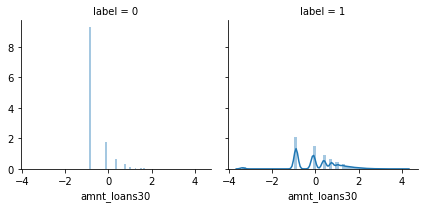

In [82]:
face=sns.FacetGrid(mcd,col='label')
face.map(sns.distplot,'amnt_loans30')
plt.show()

For Total amount of loans taken by user in last 30 days we observe that in our target variable'label' for Non-Defaulters the micro credit is been given but in the case where are defaulters we see loan is rarely given to defaulters.

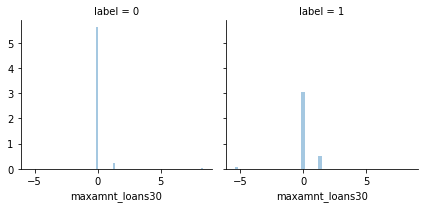

In [83]:
face=sns.FacetGrid(mcd,col='label')
face.map(sns.distplot,'maxamnt_loans30')
plt.show()

For maximum amount of loan taken by the user in last 30 days we observe regarding 'label' that non-defaulter are comparatively taking maxmium amount of loan than the defaulters.

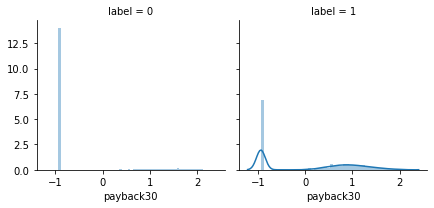

In [84]:
face=sns.FacetGrid(mcd,col='label')
face.map(sns.distplot,'payback30')
plt.show()

In 'payback30' Average payback time in days over last 30 days in this we observe regarding our target variable 'label' that the defaulter ones who are mostly not paying it during 30 days and non defaulters are of course paying it on time. 

In [15]:
# Checking of skewness in the dataset.

mcd.skew()

label                   -2.270254
aon                     10.392951
daily_decr30             3.946246
daily_decr90             4.252578
rental30                 4.560510
rental90                 4.467282
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779883
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    45.086298
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

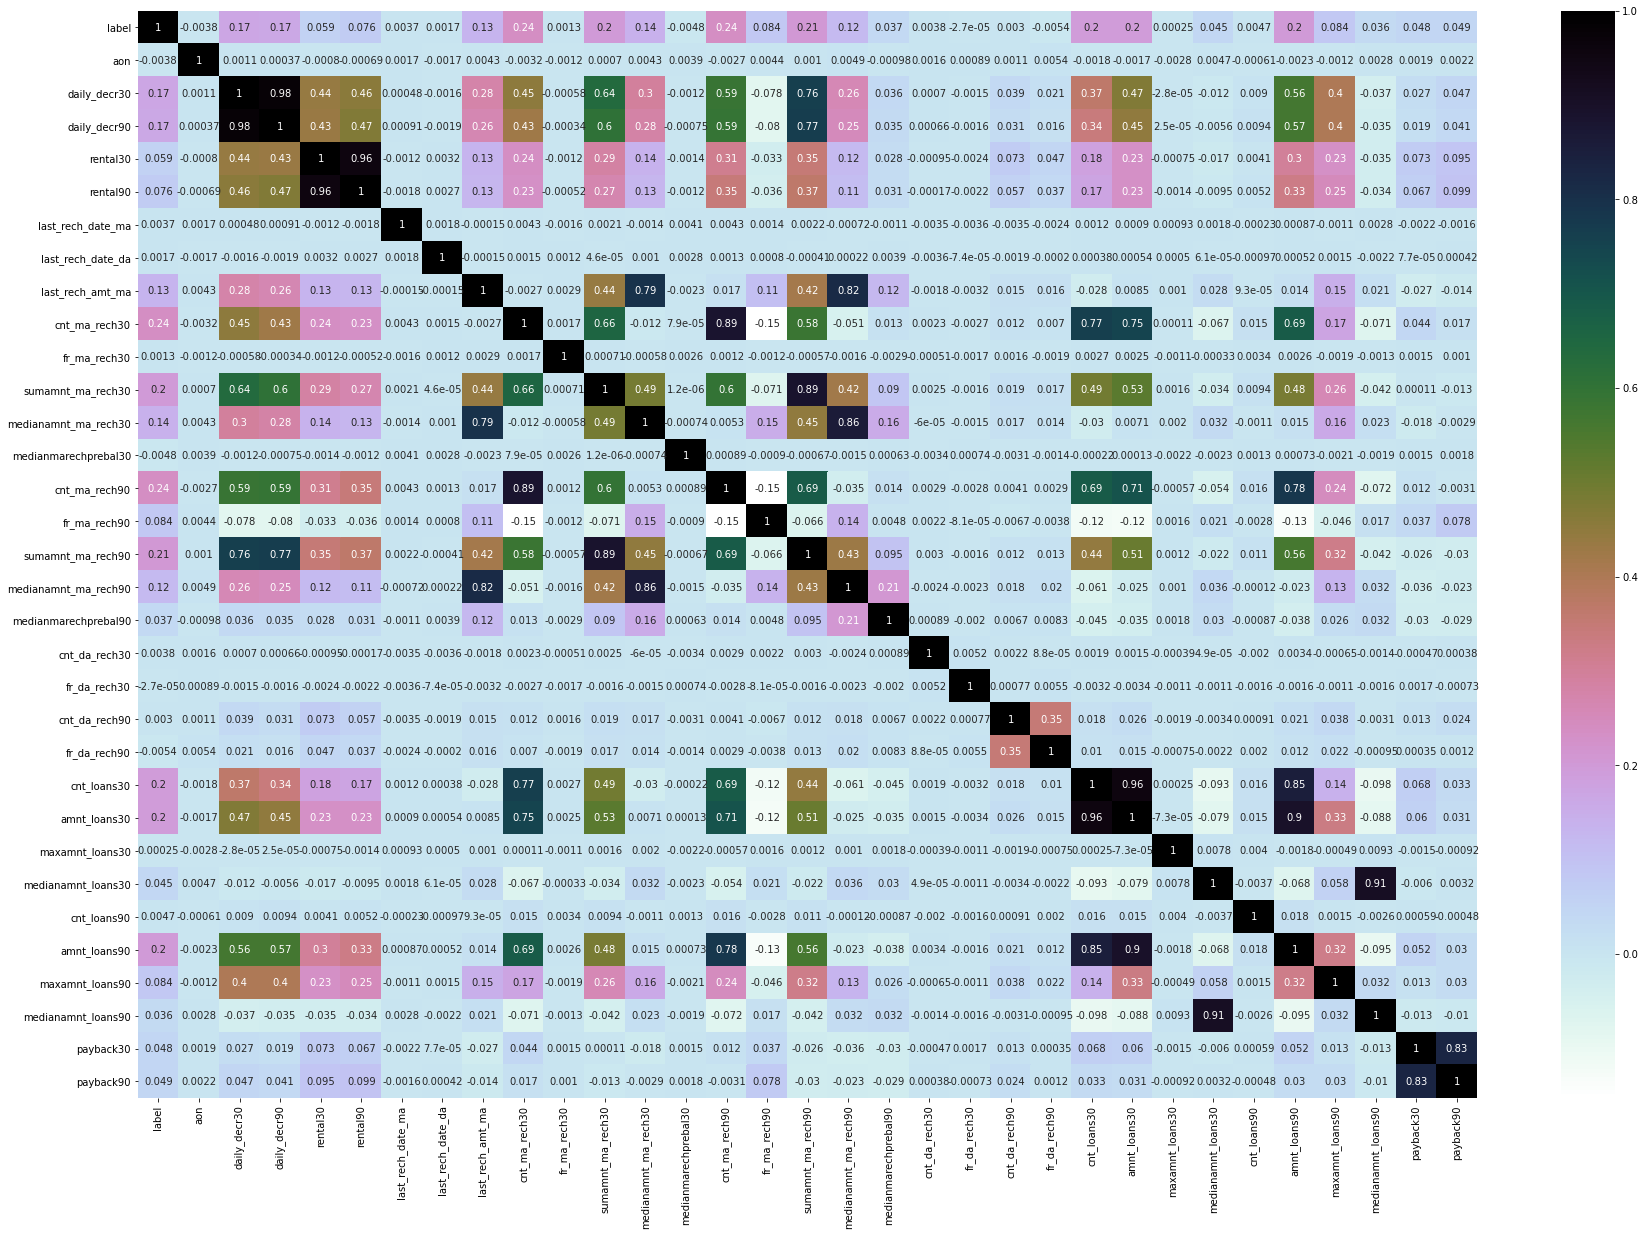

In [16]:
# Plotting of correlation matrix.

plt.figure(figsize=(30,20))
sns.heatmap(mcd.corr(),annot=True,cmap='cubehelix_r')

 Observations

- rental30 and rental90 are positively correlated with each other.
- delay_decr30 and delay_decr90 are positively correlated with each other.
- cnt_loans30 and amnt_loans30  are positively correlated with each other.
- payback30 and pacback90 are also positively correlated with each other.

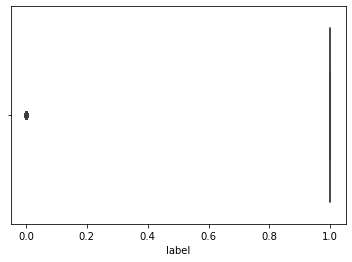

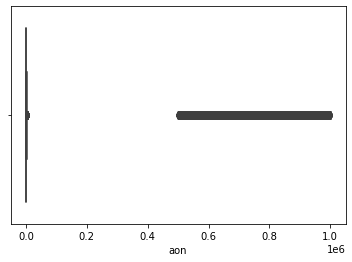

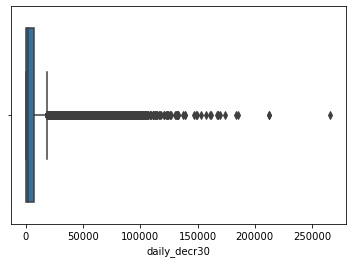

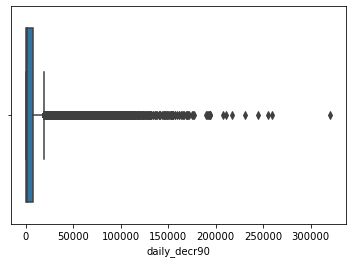

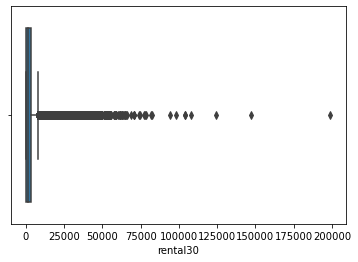

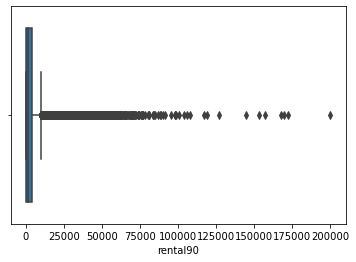

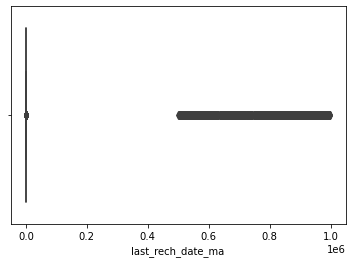

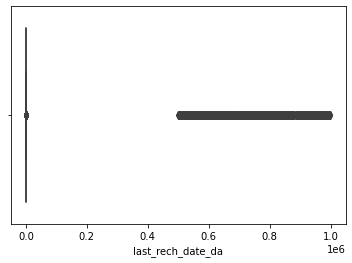

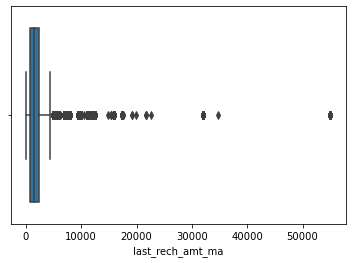

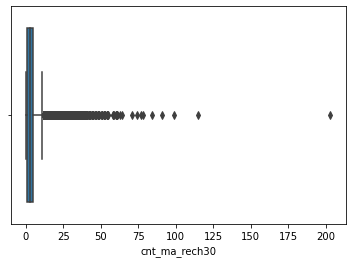

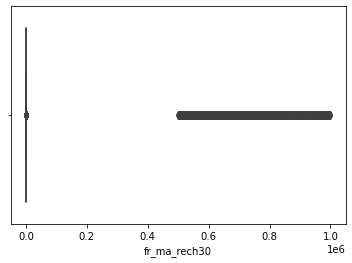

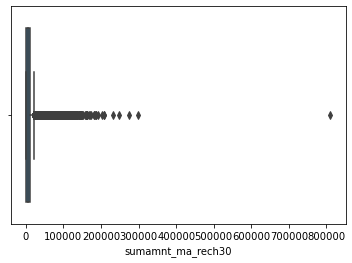

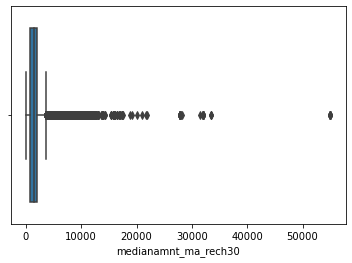

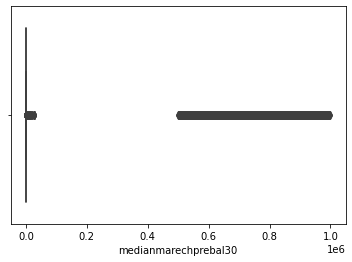

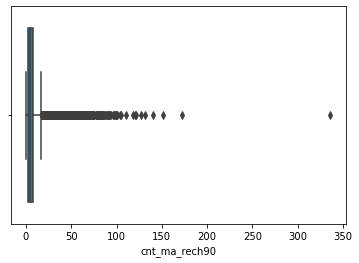

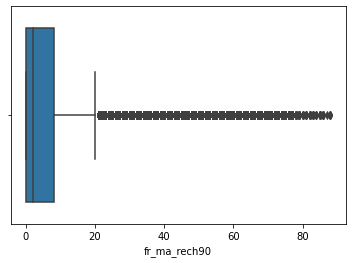

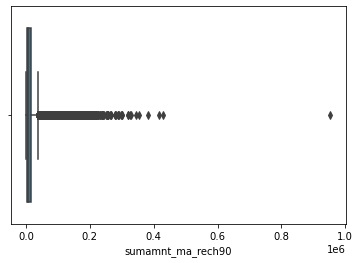

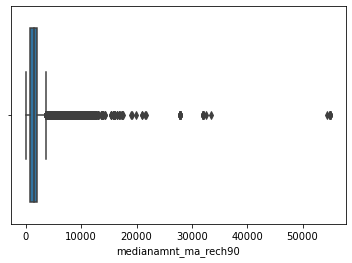

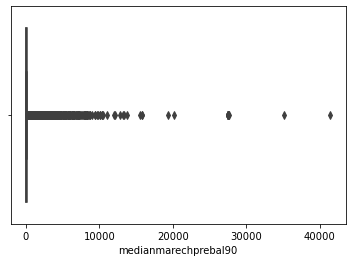

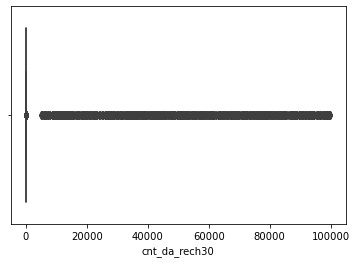

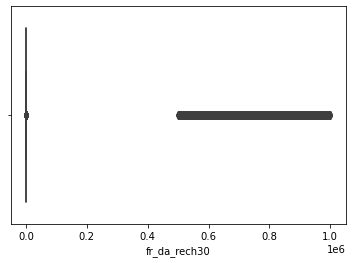

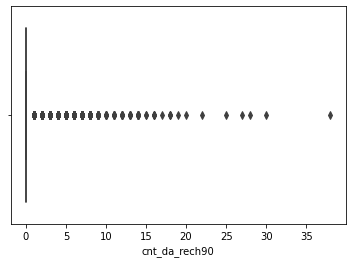

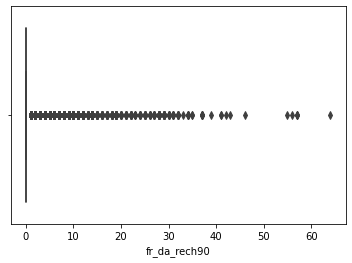

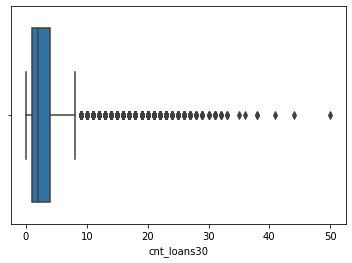

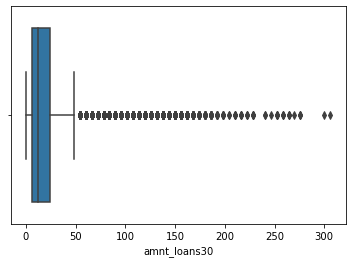

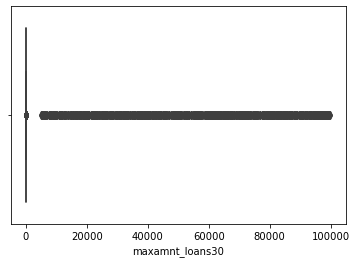

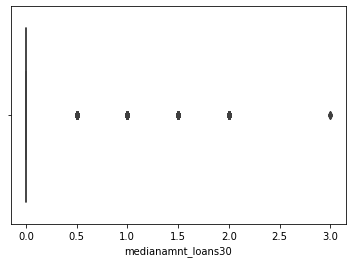

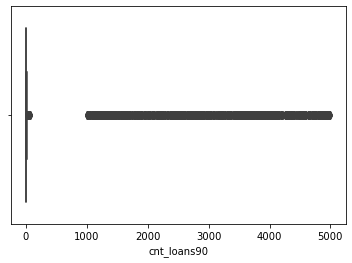

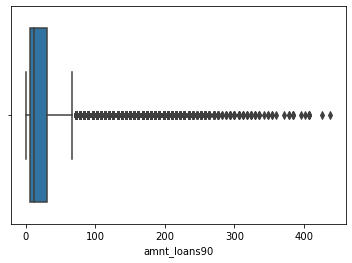

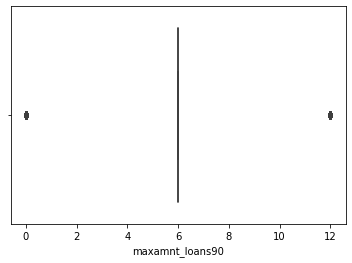

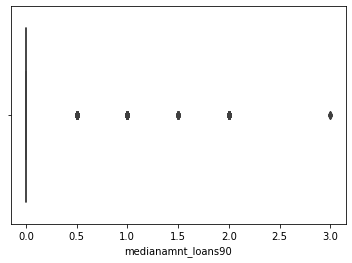

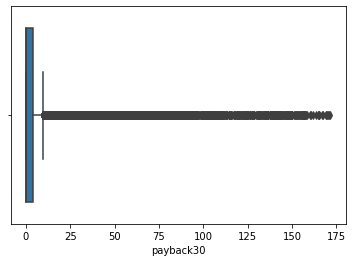

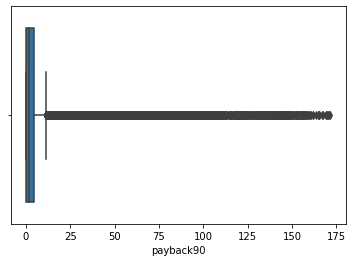

In [17]:
# Checking for Outliers
for l in mcd.columns:
    sns.boxplot(mcd[l])
    plt.show()

Observations:

We find outliers in all the columns in our dataset.

In [18]:
#Treating of skewness using Powertransform function.

from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
for i in mcd.skew().index[1:]:
    if mcd.skew().loc[i]>0.55:
        mcd[i]=pt.fit_transform(mcd[i].values.reshape(-1,1))
    if mcd.skew().loc[i]<-0.55:
        mcd[i]=pt.fit_transform(mcd[i].values.reshape(-1,1))
    else:
        mcd[i]=mcd[i]

In [19]:
mcd.skew()

label                   -2.270254
aon                     -0.298537
daily_decr30            -0.130636
daily_decr90            -0.120627
rental30                -0.040537
rental90                -0.041327
last_rech_date_ma        0.012083
last_rech_date_da        5.307319
last_rech_amt_ma        -0.061262
cnt_ma_rech30           -0.000145
fr_ma_rech30             0.165015
sumamnt_ma_rech30       -0.291322
medianamnt_ma_rech30    -0.189628
medianmarechprebal30    -0.027935
cnt_ma_rech90           -0.002465
fr_ma_rech90             0.142952
sumamnt_ma_rech90       -0.192158
medianamnt_ma_rech90    -0.044604
medianmarechprebal90     0.014084
cnt_da_rech30            6.925820
fr_da_rech30            11.390665
cnt_da_rech90            6.006577
fr_da_rech90            15.469700
cnt_loans30              0.036243
amnt_loans30             0.001948
maxamnt_loans30          0.545064
medianamnt_loans30       3.447735
cnt_loans90              0.105580
amnt_loans90            -0.008988
maxamnt_loans9

In [20]:
mcd

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,-0.510570,0.492214,0.469614,-0.805176,-0.794585,-0.300486,-0.182168,0.083417,-0.275617,...,0.011773,-0.097563,-0.130678,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,1.813266,1.783964
1,1,0.410198,1.106126,1.059052,0.774494,0.614538,1.424935,-0.182168,1.501277,-0.799355,...,-0.913019,-0.097563,1.241244,-0.269051,-1.034294,-0.250850,2.325828,-0.248272,-0.937405,-1.018917
2,1,0.150760,0.179853,0.165292,-0.120256,-0.216868,0.026239,-0.182168,0.083417,-0.799355,...,-0.913019,-0.894782,-0.130678,-0.269051,-1.034294,-1.005714,-0.285611,-0.248272,-0.937405,-1.018917
3,1,-0.636224,-1.124028,-1.121774,-0.937959,-0.989422,1.823795,-0.182168,-0.291052,-1.694157,...,0.011773,-0.097563,-0.130678,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,-0.937405,-1.018917
4,1,0.657942,-0.586130,-0.585941,-0.007664,-0.111533,0.259912,-0.182168,0.449550,0.992270,...,1.570451,1.454951,-0.130678,-0.269051,1.180312,1.097886,-0.285611,-0.248272,0.639236,0.431438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,-0.115528,-0.583595,-0.583434,-0.012763,-0.116298,-0.814667,-0.182168,1.051183,0.096120,...,0.011773,-0.097563,-0.130678,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,0.094998,-0.098305
209589,1,0.764602,-0.984481,-0.982011,0.264092,0.141814,0.259912,-0.182168,-0.429509,0.384542,...,0.556347,0.393236,-0.130678,-0.269051,0.300689,0.192260,-0.285611,-0.248272,0.094998,-0.098305
209590,1,0.714884,1.095040,1.050685,1.123108,1.247768,0.026239,-0.182168,0.083417,0.620252,...,0.924658,1.454951,1.241244,-0.269051,1.038116,1.358455,2.325828,-0.248272,0.974292,0.752939
209591,1,1.147613,1.120340,1.075701,-0.522908,-0.169986,-0.300486,5.490532,-0.429509,0.620252,...,0.011773,0.393236,1.241244,-0.269051,0.300689,0.503740,2.325828,-0.248272,-0.937405,1.337831


In [21]:
#Removing of outliers using Zscore.

z=np.abs(zscore(mcd))
threshold=3
micro=mcd[(z<3).all(axis=1)]
micro

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,-0.510570,0.492214,0.469614,-0.805176,-0.794585,-0.300486,-0.182168,0.083417,-0.275617,...,0.011773,-0.097563,-0.130678,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,1.813266,1.783964
1,1,0.410198,1.106126,1.059052,0.774494,0.614538,1.424935,-0.182168,1.501277,-0.799355,...,-0.913019,-0.097563,1.241244,-0.269051,-1.034294,-0.250850,2.325828,-0.248272,-0.937405,-1.018917
2,1,0.150760,0.179853,0.165292,-0.120256,-0.216868,0.026239,-0.182168,0.083417,-0.799355,...,-0.913019,-0.894782,-0.130678,-0.269051,-1.034294,-1.005714,-0.285611,-0.248272,-0.937405,-1.018917
3,1,-0.636224,-1.124028,-1.121774,-0.937959,-0.989422,1.823795,-0.182168,-0.291052,-1.694157,...,0.011773,-0.097563,-0.130678,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,-0.937405,-1.018917
4,1,0.657942,-0.586130,-0.585941,-0.007664,-0.111533,0.259912,-0.182168,0.449550,0.992270,...,1.570451,1.454951,-0.130678,-0.269051,1.180312,1.097886,-0.285611,-0.248272,0.639236,0.431438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209586,1,-0.581385,1.352936,1.298301,0.833466,0.846126,-0.300486,-0.182168,0.083417,1.280909,...,1.403174,2.034549,1.241244,-0.269051,1.759898,2.156675,2.325828,-0.248272,0.799201,0.449831
209588,1,-0.115528,-0.583595,-0.583434,-0.012763,-0.116298,-0.814667,-0.182168,1.051183,0.096120,...,0.011773,-0.097563,-0.130678,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,0.094998,-0.098305
209589,1,0.764602,-0.984481,-0.982011,0.264092,0.141814,0.259912,-0.182168,-0.429509,0.384542,...,0.556347,0.393236,-0.130678,-0.269051,0.300689,0.192260,-0.285611,-0.248272,0.094998,-0.098305
209590,1,0.714884,1.095040,1.050685,1.123108,1.247768,0.026239,-0.182168,0.083417,0.620252,...,0.924658,1.454951,1.241244,-0.269051,1.038116,1.358455,2.325828,-0.248272,0.974292,0.752939


In [22]:
# Checking the shape of data we have before treating and after treating of outliers.
print('before removing outliers shape was:', mcd.shape, '\n', 'after removing outliers shape is: ',micro.shape)
print('▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣')

before removing outliers shape was: (209593, 33) 
 after removing outliers shape is:  (176883, 33)
▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣


In [23]:
# Checking for total defaulters as it is imbalanced data.

defaulter=micro[micro['label']==0]
non_defaulter=micro[micro['label']==1]

In [24]:
defaulter.shape

(23322, 33)

In [25]:
non_defaulter.shape

(153561, 33)

In [26]:
# Splitting the data into x and y for train test split.

x=micro.drop(['label'],axis=1)
x

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,-0.510570,0.492214,0.469614,-0.805176,-0.794585,-0.300486,-0.182168,0.083417,-0.275617,1.603299,...,0.011773,-0.097563,-0.130678,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,1.813266,1.783964
1,0.410198,1.106126,1.059052,0.774494,0.614538,1.424935,-0.182168,1.501277,-0.799355,-1.128949,...,-0.913019,-0.097563,1.241244,-0.269051,-1.034294,-0.250850,2.325828,-0.248272,-0.937405,-1.018917
2,0.150760,0.179853,0.165292,-0.120256,-0.216868,0.026239,-0.182168,0.083417,-0.799355,-1.128949,...,-0.913019,-0.894782,-0.130678,-0.269051,-1.034294,-1.005714,-0.285611,-0.248272,-0.937405,-1.018917
3,-0.636224,-1.124028,-1.121774,-0.937959,-0.989422,1.823795,-0.182168,-0.291052,-1.694157,-1.128949,...,0.011773,-0.097563,-0.130678,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,-0.937405,-1.018917
4,0.657942,-0.586130,-0.585941,-0.007664,-0.111533,0.259912,-0.182168,0.449550,0.992270,0.188872,...,1.570451,1.454951,-0.130678,-0.269051,1.180312,1.097886,-0.285611,-0.248272,0.639236,0.431438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209586,-0.581385,1.352936,1.298301,0.833466,0.846126,-0.300486,-0.182168,0.083417,1.280909,0.649604,...,1.403174,2.034549,1.241244,-0.269051,1.759898,2.156675,2.325828,-0.248272,0.799201,0.449831
209588,-0.115528,-0.583595,-0.583434,-0.012763,-0.116298,-0.814667,-0.182168,1.051183,0.096120,0.188872,...,0.011773,-0.097563,-0.130678,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,0.094998,-0.098305
209589,0.764602,-0.984481,-0.982011,0.264092,0.141814,0.259912,-0.182168,-0.429509,0.384542,-0.239912,...,0.556347,0.393236,-0.130678,-0.269051,0.300689,0.192260,-0.285611,-0.248272,0.094998,-0.098305
209590,0.714884,1.095040,1.050685,1.123108,1.247768,0.026239,-0.182168,0.083417,0.620252,1.087596,...,0.924658,1.454951,1.241244,-0.269051,1.038116,1.358455,2.325828,-0.248272,0.974292,0.752939


In [27]:
y=micro['label']
y

0         0
1         1
2         1
3         1
4         1
         ..
209586    1
209588    1
209589    1
209590    1
209592    1
Name: label, Length: 176883, dtype: int64

In [28]:
# Scaling the data using MinMaxScaler.
mnm=MinMaxScaler()
micro=mnm.fit_transform(x)
x=pd.DataFrame(micro,columns=x.columns)
x

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0.562149,0.528429,0.522804,0.275753,0.280863,0.378501,0.0,0.430555,0.303833,0.664758,...,0.265182,0.205054,0.0,0.0,0.218509,0.188656,0.0,0.0,0.899577,0.855351
1,0.772521,0.669840,0.658010,0.576460,0.548383,0.796635,0.0,0.708143,0.191655,0.000000,...,0.000000,0.205054,1.0,0.0,0.000000,0.188656,1.0,0.0,0.000000,0.000000
2,0.713246,0.456478,0.452999,0.406135,0.390542,0.457679,0.0,0.430555,0.191655,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
3,0.533440,0.156135,0.157770,0.250476,0.243874,0.893293,0.0,0.357242,0.000000,0.000000,...,0.265182,0.205054,0.0,0.0,0.218509,0.188656,0.0,0.0,0.000000,0.000000
4,0.829125,0.280037,0.280680,0.427568,0.410540,0.514306,0.0,0.502236,0.575397,0.320627,...,0.712129,0.604379,0.0,0.0,0.570995,0.525733,0.0,0.0,0.515623,0.442603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176878,0.545969,0.726692,0.712890,0.587686,0.592350,0.378501,0.0,0.430555,0.637220,0.432723,...,0.664163,0.753458,1.0,0.0,0.720431,0.790346,1.0,0.0,0.567938,0.448216
176879,0.652406,0.280621,0.281255,0.426597,0.409635,0.253896,0.0,0.620024,0.383454,0.320627,...,0.265182,0.205054,0.0,0.0,0.218509,0.188656,0.0,0.0,0.337636,0.280942
176880,0.853494,0.188279,0.189829,0.479300,0.458637,0.514306,0.0,0.330135,0.445230,0.216303,...,0.421337,0.331293,0.0,0.0,0.344201,0.299398,0.0,0.0,0.337636,0.280942
176881,0.842135,0.667287,0.656091,0.642823,0.668601,0.457679,0.0,0.430555,0.495716,0.539287,...,0.526950,0.604379,1.0,0.0,0.534332,0.590854,1.0,0.0,0.625200,0.540715


Using SMOTETomek for handling imbalanced data which uses under sampling method tomek with an over sampling method SMOTE to handle imbalanced data.

In [29]:
!pip install imblearn
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [30]:
smk=SMOTETomek(random_state=30)

In [31]:
X_res, y_res = smk.fit_sample(x,y)

In [32]:
X_res.shape

(305078, 32)

In [33]:
y_res.shape

(305078,)

In [34]:
y_res.value_counts()

1    152539
0    152539
Name: label, dtype: int64

In [35]:
list=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier()]
for g in list:
    print('for the algorithm: ',g)
    x_train,x_test,y_train,y_test=train_test_split(X_res,y_res,test_size=.30,random_state=40)
    g.fit(x_train,y_train)
    pred=g.predict(x_test)
    accuracy=accuracy_score(pred,y_test)
    scr=g.score(x_train,y_train)
    pred=g.predict(x_test)
    accuracy=accuracy_score(pred,y_test)
    print('The score is: ',scr)
    print('Accuracy score is: ',accuracy)
    print('confusion matrix: \n',confusion_matrix(pred,y_test))
    print('classification report: \n',classification_report(pred,y_test))  

for the algorithm:  LogisticRegression()
The score is:  0.7765249070492709
Accuracy score is:  0.7750535378698483
confusion matrix: 
 [[36227 10971]
 [ 9617 34709]]
classification report: 
               precision    recall  f1-score   support

           0       0.79      0.77      0.78     47198
           1       0.76      0.78      0.77     44326

    accuracy                           0.78     91524
   macro avg       0.78      0.78      0.77     91524
weighted avg       0.78      0.78      0.78     91524

for the algorithm:  GaussianNB()
The score is:  0.757265141369396
Accuracy score is:  0.7551789694506359
confusion matrix: 
 [[35496 12059]
 [10348 33621]]
classification report: 
               precision    recall  f1-score   support

           0       0.77      0.75      0.76     47555
           1       0.74      0.76      0.75     43969

    accuracy                           0.76     91524
   macro avg       0.76      0.76      0.76     91524
weighted avg       0.76      0

In [49]:
# applying cross validation to the best model to see if it is under fitting or over fitting
from sklearn.model_selection import cross_val_score
list=[RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),LogisticRegression()]
for m in list:
    print(m,'\n')
    cv=cross_val_score(m,x,y,cv=5)
    print('The cross validation score is: ',cv)
    print('The mean and standard deviations are: ',cv.mean(),cv.std())
    print('\n')

RandomForestClassifier() 

The cross validation score is:  [0.90926308 0.90801933 0.90889561 0.91022162 0.9089213 ]
The mean and standard deviations are:  0.9090641894051036 0.0007098955616980316


DecisionTreeClassifier() 

The cross validation score is:  [0.86180287 0.86174633 0.86259434 0.86086612 0.86063998]
The mean and standard deviations are:  0.8615299290844665 0.0007052575390951978


KNeighborsClassifier() 

The cross validation score is:  [0.89753229 0.89583628 0.89569494 0.89628562 0.89458955]
The mean and standard deviations are:  0.895987737090028 0.0009526784268825857


LogisticRegression() 

The cross validation score is:  [0.87658648 0.87610594 0.87627555 0.87712008 0.87743103]
The mean and standard deviations are:  0.8767038163276032 0.0005013471091538562




In [36]:
from sklearn.model_selection import KFold
lg=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [37]:
#Hyperparameter tuning using GridSearchCV for Logistic Regression
clf=GridSearchCV(lg,grid,cv=cv,n_jobs=-1,scoring='accuracy')
clf.fit(x_train,y_train)
print(clf.best_params_)

{'C': 1.0, 'penalty': 'l2'}


In [38]:
#Hyperparameter tuning using GridSearchCV for RandomForestClassifier to find out best parameteres.
parameters={'n_estimators' :[100,200,300],'criterion':['gini','entropy']}
rfc=RandomForestClassifier()
clf=GridSearchCV(rfc,parameters,n_jobs=-1,scoring='accuracy')
clf.fit(x,y)
print(clf.best_params_)

{'criterion': 'gini', 'n_estimators': 200}


In [39]:
#Hyperparameter tuning using GridSearchCV for SVC to find out best params.
parameters={'kernel':['linear','poly','rbf']}
svc=SVC()
clf=GridSearchCV(svc,parameters,n_jobs=-1,scoring='accuracy')
clf.fit(x_train,y_train)
print(clf.best_params_ )

{'kernel': 'rbf'}


In [44]:
#For KNeighborsClassifier
parameters={ 'n_neighbors' :[1,10],'weights':['uniform','distance']}
knc=KNeighborsClassifier()
clf=GridSearchCV(knc,parameters,n_jobs=-1,scoring='accuracy')
clf.fit(x_train,y_train)
print(clf.best_params_)

{'n_neighbors': 1, 'weights': 'uniform'}


In [46]:
#Hyperparameter tuning using GridSearchCV for DecisionTreeClassifier to find out best params.

parameters={'criterion':['gini','entropy']}
dtc=DecisionTreeClassifier()
clf=GridSearchCV(dtc,parameters,n_jobs=-1,scoring='accuracy')
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'entropy'}


In [53]:
rf=RandomForestClassifier(criterion='gini',n_estimators=200)
dt=DecisionTreeClassifier(criterion='entropy')
lg=LogisticRegression(C=1,penalty='l2')
kn=KNeighborsClassifier(n_neighbors= 1, weights='uniform')
sc=SVC(kernel='rbf')

In [54]:
Model=[]
Model.append(('RandomForestClassifier',rf))
Model.append(('DecisionTreeClassifier',dt))
Model.append(('KNeighborsClassifier',kn))
Model.append(('LogisticRegression',lg))
Model.append(('SVC',sc))



RandomForestClassifier 

RandomForestClassifier(n_estimators=200)


Accuracy Score:  0.9414142738516673


F1 Score:  0.9412061403508772
AUC_ROC_Score 0.9414109532120734


[[43243  2601]
 [ 2761 42919]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     45844
           1       0.94      0.94      0.94     45680

    accuracy                           0.94     91524
   macro avg       0.94      0.94      0.94     91524
weighted avg       0.94      0.94      0.94     91524



AxesSubplot(0.125,0.808774;0.775x0.0712264)


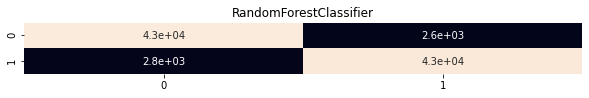

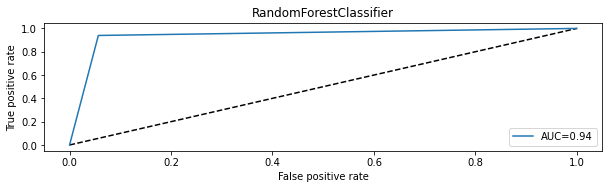



DecisionTreeClassifier 

DecisionTreeClassifier(criterion='entropy')


Accuracy Score:  0.8953935579738648


F1 Score:  0.8939991142604075
AUC_ROC_Score 0.8953728606539103


[[41577  4267]
 [ 5307 40373]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.91      0.90     45844
           1       0.90      0.88      0.89     45680

    accuracy                           0.90     91524
   macro avg       0.90      0.90      0.90     91524
weighted avg       0.90      0.90      0.90     91524



AxesSubplot(0.125,0.808774;0.775x0.0712264)


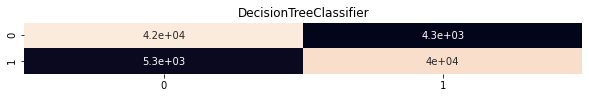

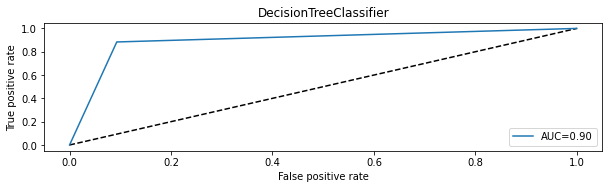



KNeighborsClassifier 

KNeighborsClassifier(n_neighbors=1)


Accuracy Score:  0.9233862156374284


F1 Score:  0.9176434662093913
AUC_ROC_Score 0.9232642316950609


[[45447   397]
 [ 6615 39065]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.99      0.93     45844
           1       0.99      0.86      0.92     45680

    accuracy                           0.92     91524
   macro avg       0.93      0.92      0.92     91524
weighted avg       0.93      0.92      0.92     91524



AxesSubplot(0.125,0.808774;0.775x0.0712264)


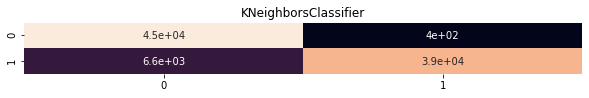

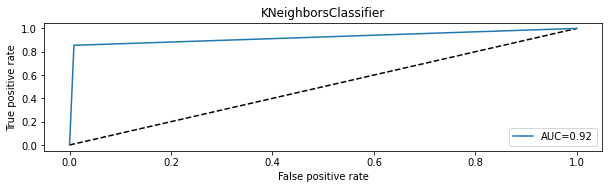



LogisticRegression 

LogisticRegression(C=1)


Accuracy Score:  0.7750535378698483


F1 Score:  0.7712596937981911
AUC_ROC_Score 0.7750263065668067


[[36227  9617]
 [10971 34709]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.79      0.78     45844
           1       0.78      0.76      0.77     45680

    accuracy                           0.78     91524
   macro avg       0.78      0.78      0.77     91524
weighted avg       0.78      0.78      0.77     91524



AxesSubplot(0.125,0.808774;0.775x0.0712264)


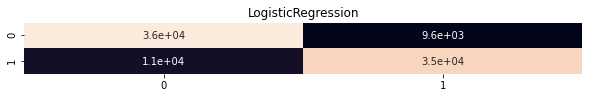

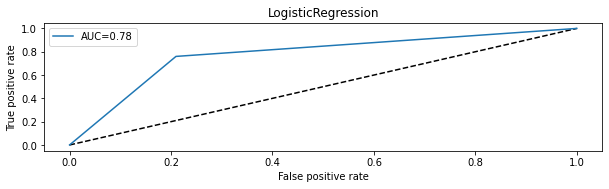



SVC 

SVC()


Accuracy Score:  0.8041934356015908


F1 Score:  0.7971521387257066
AUC_ROC_Score 0.8041338174416521


[[38390  7454]
 [10467 35213]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.84      0.81     45844
           1       0.83      0.77      0.80     45680

    accuracy                           0.80     91524
   macro avg       0.81      0.80      0.80     91524
weighted avg       0.81      0.80      0.80     91524



AxesSubplot(0.125,0.808774;0.775x0.0712264)


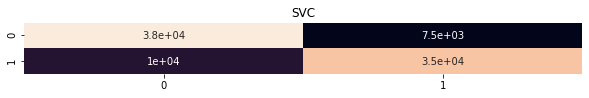

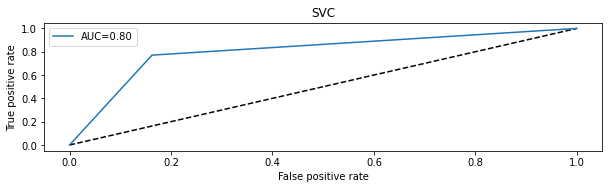

In [58]:
Models=[]
Score=[]
Roc_Score=[]
F1=[]

for name,model in Model:
    print(name, '\n')
    Models.append(name)
    
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    
# Accuracy Matrix
    a=accuracy_score(y_test,pred)
    print('Accuracy Score: ',a)
    Score.append(a*100)
    print('\n')
    
# F1 Score
    f=f1_score(y_test,pred)
    print('F1 Score: ',f)
    F1.append(f)
    
# ROC_AUC_Score
    false_positive_rate,true_positive_rate,threshold=roc_curve(y_test,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print("AUC_ROC_Score",roc_auc)
    Roc_Score.append(roc_auc*100)
    print("\n")
    
#Confusion Matrix
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    
#Classification Report
    print("Classification Report: \n",classification_report(y_test,pred))
    print('\n')
    
#Confusion Matrix using Heatmap
    plt.figure(figsize=(10,10))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True,cbar=False))
    plt.show()
    print('\n')
    
#Auc_Roc_curve
    plt.figure(figsize=(10,25))
    plt.subplot(911)
    plt.title(name)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%.2f'%roc_auc)
    plt.legend(loc='Lower Right')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')
    plt.show()
    print('\n')

In [60]:
pd.DataFrame({"Models":Models,"Accuracy Score":Score,'F1 Score':F1,'ROC_AUC_Score':Roc_Score})

,Models,Accuracy Score,F1 Score,ROC_AUC_Score
0,RandomForestClassifier,94.141427,0.941206,94.141095
1,DecisionTreeClassifier,89.539356,0.893999,89.537286
2,KNeighborsClassifier,92.338622,0.917643,92.326423
3,LogisticRegression,77.505354,0.771260,77.502631
4,SVC,80.419344,0.797152,80.413382


As we can see that RandomForestClassifier is working best among other models and also it overcomes over fitting of data than other models.

In [89]:
#Saving the best model Random Forest Classifier with best parameters.
import joblib
joblib.dump(rf,'microcredit_Indonesia.pkl')


['microcredit_Indonesia.pkl']